In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
df = pd.read_csv('packet_data.csv')
column_topics = ['Status', 'Time', 'Packet']
df.columns = column_topics
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (5749, 3)


,Status,Time,Packet
0,start,1.706262e+09,2
1,start,1.706262e+09,3
2,end,1.706262e+09,2
3,start,1.706262e+09,4
4,end,1.706262e+09,3


In [12]:
df_start = df[df['Status'] == 'start']
print("Shape of the dataset with Status = start:", df_start.shape)
df_start.head()

Shape of the dataset with Status = start: (2875, 3)


,Status,Time,Packet
0,start,1.706262e+09,2
1,start,1.706262e+09,3
3,start,1.706262e+09,4
5,start,1.706262e+09,5
7,start,1.706262e+09,6


In [13]:
df_end = df[df['Status'] == 'end']
print("Shape of the dataset with Status = end:", df_end.shape)
df_end.head()

Shape of the dataset with Status = end: (2874, 3)


,Status,Time,Packet
2,end,1.706262e+09,2
4,end,1.706262e+09,3
6,end,1.706262e+09,5
8,end,1.706262e+09,6
10,end,1.706262e+09,7


In [43]:
start_packet_list = df_start["Packet"].to_list()
end_packet_list = df_end["Packet"].to_list()
start_time_list = df_start["Time"].to_list()
end_time_list = df_end["Time"].to_list()

delay_list = []
num_start_packets = df_start.shape[0]
num_end_packets = df_end.shape[0]

for start_ in range(num_start_packets):
    for end_ in range(num_end_packets):
        if (end_packet_list[end_] == start_packet_list[start_]):
            round_trip_time = end_time_list[end_] - start_time_list[start_]
            delay = round_trip_time / 2
            delay_list.append(delay)
            break

print("Number of time delays:", len(delay_list))

Number of time delays: 2167


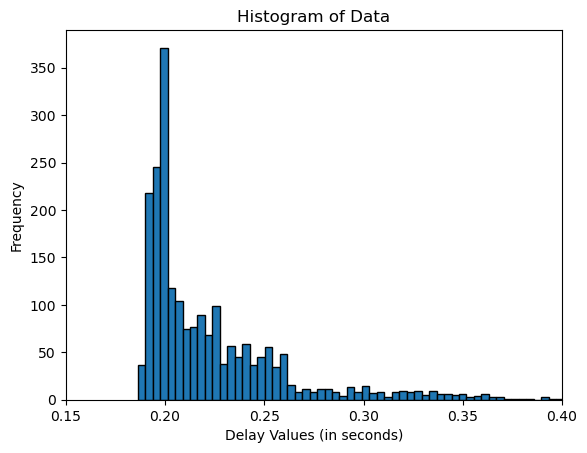

In [65]:
plt.hist(delay_list, bins=150, edgecolor='black')
plt.xlabel('Delay Values (in seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.xlim(0.15, 0.4)
plt.show()

In [44]:
average = sum(delay_list) / len(delay_list)
print("Average delay time:", average, "seconds")

Average delay time: 0.2248520950705542 seconds
